In [1]:
# 필요한 라이브러리 import

import pandas as pd
import numpy as np
import seaborn as sns

import math
from datetime import datetime

In [2]:
# 데이터 불러오기
df = pd.read_csv('fraud.csv')

In [3]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,...,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [4]:
# 전체 데이터를 보기 위해 옵션 설정
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


## 데이터 확인

* trans_date_trans_time : 트랜잭션이 일어난 연월일 시분초


* cc_num : 카드 번호


* merchant : 구매를 진행한 상점


* category : 구매한 개별 건의 카테고리


* amt : 구매한 액수


* first, last, gender : 카드 소유자의 이름, 성, 성별


* street, state, zip : 카드 소유자의 주소, 도시, 주, 우편번호


* lat, long : 카드 소유자의 위도, 경도


* city_pop : 카드 소유자의 도시의 인구


* job : 카드 소유자의 직업


* dob : 카드 소유자의 생일


* trans_num : 트랜잭션 고유번호


* unix_time : 트랜잭션 발생 시간의 unix형 데이터


* merch_lat, merch_long : 상점의 위도, 경도  


* is_fraud : 사기 여부

## 컬럼 분석


* 모델링과 분석을 위해서는 트랜잭션의 정확한 시간보다는 어떤 월, 어떤 시간대에 사기 건이 많이 발생하는지 확인하는 것이 좋을 것으로 보인다.


* 카드 번호별 데이터가 어느 정도 있는지도 확인해 보는 것이 좋을 것 같다. 


* 상점의 이름, 카드 소유자의 이름 등은 크게 중요하지 않은 정보로 판단된다. 


* 디테일한 주소나 시, 우편번호, 시의 인구수 등도 마찬가지이지만 주별 사기 건수 정보는 유의미하게 활용할 수 있을 것 같아 state 컬럼은 남기는 것이 나을 것 같다.


* 성별 정보도 남겨서 분석해볼 수 있겠다. 


* 특정 직업군에 사기를 더 많이 시도하는 경우가 있을 수 있으므로 job 컬럼은 확인해볼 필요가 있다. 


* 생일 정보 자체는 크게 중요하지 않을 수 있으나, 트랜잭션 시간과 함께 연령 정보를 확인할 수 있으므로 새로운 feature를 만들어볼 수 있을 것 같다. 


* trans_num은 고유번호이므로 크게 중요하지 않을 것 같다. 


* unix_time은 어떤 이유로 들어가있는지 확인해봐야 할 것 같다. 


* 상점의 위도와 경도, 카드소유자의 위도와 경도 정보는 서로간의 거리에 따라 사기인지 아닌지 확인해볼 수 있을 것 같다(카드 소유자의 위치와 상점의 거리가 너무 멀면 해당 지점에서 결제된 것이 아닌, 사기 데이터일 수 있으므로).

In [6]:
# 중복 데이터 확인
# 중복된 데이터 없음
df[df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [7]:
# unix_time과 trans_date_trans_time의 차이가 -2557로 일정함
# 차이가 다른 데이터가 있으면 확인해보고 없으면 중복되는 컬럼으로 간주 후 삭제
count = 0

for i in range(20000):
    a = datetime.fromtimestamp(df['unix_time'][i]) - pd.to_datetime(df['trans_date_trans_time'][i])
    if a.days != -2557:
        count += 1

In [8]:
# 중복 데이터 없음
count

0

In [9]:
# 각각 컬럼별 고유값 수 확인
df['city'].nunique()

121

In [10]:
# state값이 크기는 하나, 이 데이터는 유의미할 것으로 판단됨
df['state'].nunique()

44

In [11]:
# job의 수가 많음
# 컬럼 개수를 늘리는 문제가 있어 줄일 수 있을지 확인
df['job'].nunique()

110

In [12]:
# 다양한 직업이 중구난방으로 있어, 데이터 분석에 유의미한 정보를 제공할 것으로 기대하기 어려움
df['job'].unique()

array(['Special educational needs teacher', 'Operational researcher',
       'Leisure centre manager', 'Police officer', 'Designer, furniture',
       'Librarian, public', 'Fine artist', 'Tourism officer',
       'Surveyor, minerals', 'Research officer, political party',
       'Engineer, electronics', 'Water engineer', 'Tree surgeon',
       'Careers information officer', 'Claims inspector/assessor',
       'Exhibitions officer, museum/gallery',
       'Research scientist (physical sciences)', 'Operations geologist',
       'Systems developer', 'Environmental consultant', 'Energy engineer',
       'Materials engineer', 'Television production assistant',
       'Medical sales representative', 'Therapist, sports',
       'Structural engineer', 'Commercial/residential surveyor',
       'Film/video editor', 'Electronics engineer',
       'Historic buildings inspector/conservation officer',
       'Immunologist', 'Psychologist, forensic', 'Contractor',
       'Health physicist', 'Land', 'I

In [13]:
# 124장의 고유 카드에 대한 49만개의 데이터임을 확인할 수 있음
df['cc_num'].nunique()

124

In [14]:
# trans_num이 완벽한 고유값인지 확인
df['trans_num'].nunique()

491134

In [15]:
# category 데이터가 몇 개인지 확인
df['category'].nunique()

14

In [16]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [17]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [18]:
# 필요한 컬럼만 남기고 삭제
# 하드코딩 방식인 이유는 추후 들어올 데이터를 위한 코드 작업을 위함임
df = df[['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'state', 'lat', 'long', 'dob', 'merch_lat', 'merch_long', 'is_fraud']]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   category               491134 non-null  object 
 3   amt                    491134 non-null  float64
 4   gender                 491134 non-null  object 
 5   state                  491134 non-null  object 
 6   lat                    491134 non-null  float64
 7   long                   491134 non-null  float64
 8   dob                    491134 non-null  object 
 9   merch_lat              491134 non-null  float64
 10  merch_long             491134 non-null  float64
 11  is_fraud               491134 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 45.0+ MB


In [20]:
# trans_date_trans_time 데이터와 dob 데이터가 object 타입이므로 datetime 형식으로 변환
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

/tmp/ipykernel_293/3846314157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
/tmp/ipykernel_293/3846314157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dob'] = pd.to_datetime(df['dob'])


In [21]:
# 확인의 편의를 위해 컬럼명 변경
df = df.rename({'trans_date_trans_time': 'trans_dt'}, axis=1)

In [22]:
# trans_dt에서 dob를 뺀 후 내림 함수를 적용하면 나이가 계산됨
df['age'] = ((df['trans_dt'] - df['dob']).dt.days / 365).apply(math.floor)

In [23]:
# 시간 데이터에서 유의미한 정보는 사기가 연중 몇 월에 많이 일어나는지, 어느 시간대에 많이 일어나는지로 판단
# trans_dt에서 hour과 month 속성을 추출 후 각각의 컬럼으로 생성
df['trans_hour'] = df['trans_dt'].dt.hour

In [24]:
df['trans_month'] = df['trans_dt'].dt.month

In [25]:
# dob와 trans_dt 컬럼 삭제
df.drop(['dob', 'trans_dt'], axis=1, inplace=True)

In [26]:
# 결측치 없음
df.isna().sum()

cc_num         0
category       0
amt            0
gender         0
state          0
lat            0
long           0
merch_lat      0
merch_long     0
is_fraud       0
age            0
trans_hour     0
trans_month    0
dtype: int64

In [27]:
# 이상치 확인
# amt값이 비정상적으로 큰 값들을 확인할 수 있을 것 같음
# 14세의 나이에 카드를 사용하는 것도 의문
df.describe()

,cc_num,amt,lat,long,merch_lat,merch_long,is_fraud,age,trans_hour,trans_month
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,37.931230,-90.495619,37.930272,-90.495411,0.002533,34.671475,14.123087,7.154286
std,1.260229e+18,160.322867,5.341193,12.990732,5.372986,13.004100,0.050264,9.297933,6.406759,3.425474
min,5.038744e+11,1.000000,24.655700,-122.345600,23.655789,-123.345106,0.000000,14.000000,0.000000,1.000000
25%,2.131124e+14,8.960000,33.746700,-97.235100,33.781388,-96.984814,0.000000,27.000000,10.000000,4.000000
50%,3.531130e+15,42.170000,38.507200,-87.591700,38.545124,-87.573441,0.000000,35.000000,15.000000,7.000000
75%,4.653879e+15,80.330000,41.520500,-80.731000,41.624294,-80.685567,0.000000,43.000000,19.000000,10.000000
max,4.956829e+18,25086.940000,48.887800,-69.965600,49.887523,-68.965624,1.000000,50.000000,23.000000,12.000000


In [28]:
# age컬럼을 기준으로 정렬
df['age'].sort_values()

43475     14
29368     14
29371     14
10411     14
215972    14
          ..
441501    50
441502    50
429321    50
422274    50
395252    50
Name: age, Length: 491134, dtype: int64

In [29]:
# age가 14인 값들이 2256개임
# 42만개의 데이터 중에서 큰 부분을 차지
df[df['age'] == 14]

,cc_num,category,amt,gender,state,lat,long,merch_lat,merch_long,is_fraud,age,trans_hour,trans_month
44,4587657402165341815,grocery_net,25.89,F,IL,41.0646,-87.5917,40.888445,-87.409615,0,14,3,1
45,4587657402165341815,gas_transport,77.59,F,IL,41.0646,-87.5917,41.818260,-88.129609,0,14,3,1
179,3576021480694169,shopping_pos,9.19,F,KS,39.1329,-95.7023,38.949619,-95.471502,0,14,12,1
246,4587657402165341815,misc_net,130.90,F,IL,41.0646,-87.5917,40.654588,-86.742835,0,14,14,1
261,4587657402165341815,misc_net,115.91,F,IL,41.0646,-87.5917,41.091189,-87.636425,0,14,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237538,3576021480694169,misc_pos,4.21,F,KS,39.1329,-95.7023,38.368576,-96.522479,0,14,15,12
237714,3576021480694169,travel,5.31,F,KS,39.1329,-95.7023,39.545129,-95.220347,0,14,18,12
237918,3576021480694169,personal_care,21.52,F,KS,39.1329,-95.7023,38.326944,-96.025733,0,14,22,12
237960,3576021480694169,misc_net,5.52,F,KS,39.1329,-95.7023,39.319196,-95.752853,0,14,22,12


In [30]:
# 14세 바로 위의 값들을 보니 15세임
# 이 값들은 지울 수 없겠다고 판단
df[df['age'] > 14]['age'].sort_values()

327622    15
18931     15
219688    15
293318    15
122140    15
          ..
427578    50
442245    50
409046    50
463418    50
487190    50
Name: age, Length: 488878, dtype: int64

In [31]:
# amt는 트랜잭션별 구매금액
# 오름차순 정렬
df['amt'].sort_values()

258861        1.00
254027        1.00
469101        1.00
257652        1.00
172571        1.00
            ...   
43412     14630.68
198719    15047.03
410031    16837.08
49446     17897.24
93045     25086.94
Name: amt, Length: 491134, dtype: float64

<AxesSubplot:ylabel='amt'>

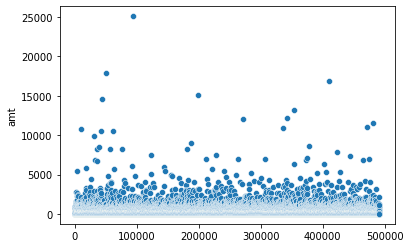

In [32]:
# scatterplot 시각화
# 큰 값들이 비정상적이라고 보기는 어렵지만 데이터의 일관성을 해치는 부분이 있는 것도 사실임
sns.scatterplot(x=df.index, y=df['amt'])

In [33]:
# 50개의 데이터 모두 사기 데이터가 아님
df[df['amt'] > 5000]

,cc_num,category,amt,gender,state,lat,long,merch_lat,merch_long,is_fraud,age,trans_hour,trans_month
3140,3567697931646329,shopping_pos,5444.24,M,NY,42.2470,-73.7552,41.588036,-73.799288,0,20,23,1
9831,2264937662466770,travel,10776.59,M,TX,29.3641,-98.4924,29.772325,-98.593405,0,23,15,1
17741,3525590521269779,travel,5816.67,M,NC,36.0424,-79.3242,35.736953,-80.102057,0,34,18,2
30016,4745996322265,travel,9931.82,F,IN,41.4802,-86.6919,41.877139,-86.167379,0,20,15,3
32817,4302480582202074,shopping_net,6818.74,M,MI,43.2326,-86.2492,43.300820,-86.432623,0,23,16,3
36187,3556613125071656,travel,6756.43,M,TX,29.0393,-95.4401,29.507833,-95.274101,0,19,16,3
36430,6011893664860915,travel,8217.23,F,CO,39.5994,-105.0044,38.653941,-105.447822,0,43,22,3
38830,6011367958204270,travel,8524.52,F,OH,41.2419,-81.7453,41.588827,-81.843264,0,30,17,3
42020,372509258176510,travel,10469.09,F,MI,42.9147,-83.4845,42.192907,-84.094660,0,33,17,3
43412,630451534402,travel,14630.68,F,MI,46.3535,-86.6345,46.944452,-85.746696,0,46,16,3


In [34]:
# amt가 5000 이하인 데이터만 남긴다고 하더라도 50건 정도의 데이터만 삭제되고
# 이는 전체 데이터의 0.01%에 해당하는 작은 수치이므로 삭제
df = df[df['amt'] <= 5000]

In [35]:
df

,cc_num,category,amt,gender,state,lat,long,merch_lat,merch_long,is_fraud,age,trans_hour,trans_month
0,630423337322,grocery_pos,107.23,F,WA,48.8878,-118.2105,49.159047,-118.186462,0,40,0,1
1,4956828990005111019,grocery_pos,44.71,M,NJ,40.6747,-74.2239,40.079588,-74.848087,0,38,0,1
2,180048185037117,grocery_net,46.28,F,NJ,40.6152,-74.4150,40.021888,-74.228188,0,44,0,1
3,374930071163758,grocery_pos,64.09,M,MI,42.2203,-83.3583,42.360426,-83.552316,0,47,0,1
4,2712209726293386,misc_pos,25.58,F,LA,30.4066,-91.1468,29.737426,-90.853194,0,41,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,6011109736646996,home,134.26,F,NC,34.2651,-77.8670,34.853497,-78.664158,0,37,23,12
491130,213112402583773,shopping_pos,25.49,F,SC,34.0326,-82.2027,35.008839,-81.475156,0,36,23,12
491131,3556613125071656,kids_pets,111.84,M,TX,29.0393,-95.4401,29.661049,-96.186633,0,21,23,12
491132,6011724471098086,kids_pets,86.88,F,WA,46.1966,-118.9017,46.658340,-119.715054,0,39,23,12


<AxesSubplot:ylabel='amt'>

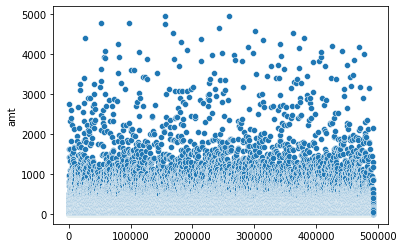

In [36]:
# 분포가 조금 더 안정적인 모습을 확인할 수 있음
sns.scatterplot(x=df.index, y=df['amt'])

In [37]:
# 위도와 경도를 계산하여 거리 정보를 계산하면 유의미한 데이터로 활용할 수 있음
# 위도 경도 계산 라이브러리인 geopy를 설치
!pip install geopy

In [38]:
from geopy.distance import geodesic as gd

In [39]:
# geopy.distance의 geodesic 함수를 사용하면
# geodesic((lat1, long1), (lat2, long2)) 형식으로 거리를 계산해줌
# 이 데이터는 distance형 자료로 저장되며, 이것을 해결하기 위해 뒤에 .km을 붙여주면 float형 자료로 받을 수 있음
gd((df['lat'][0], df['long'][0]), (df['merch_lat'][0], df['merch_long'][0]))

Distance(30.216618410409005)

In [40]:
# apply 메서드로 distance 컬럼 생성
df['distance'] = df.apply(lambda x: gd((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis=1)

In [41]:
# 컬럼 생성 후 남은 컬럼들은 삭제
df = df.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1)

In [42]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491084 entries, 0 to 491133
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cc_num       491084 non-null  int64  
 1   category     491084 non-null  object 
 2   amt          491084 non-null  float64
 3   gender       491084 non-null  object 
 4   state        491084 non-null  object 
 5   is_fraud     491084 non-null  int64  
 6   age          491084 non-null  int64  
 7   trans_hour   491084 non-null  int64  
 8   trans_month  491084 non-null  int64  
 9   distance     491084 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 57.3+ MB


통계학적 분석 도구 중 하나인 zscore를 통해 cc_num별 amt값이 평균에서 얼마나 벗어나있는지 계산한 값이 유의미한 변수로 활용할 수 있을 것으로 예상

zscore은 데이터포인트가 평균으로부터 얼마나 떨어져있는지를 계산한다.

데이터의 평균값에서 비정상적으로 벗어나 있는 데이터 포인트는 사기 건으로 예측할 수 있을 것 같다.

zscore은 (x - x.mean) / x.std이므로 해당하는 컬럼을 계산으로 만들 수 있다.

In [43]:
# cc_num별 mean값을 추출
# 생성되는 결과가 Series이므로 데이터프레임으로 변경하고, df와의 merge를 위해 index를 reset
amt_mean = pd.DataFrame(df.groupby('cc_num')['amt'].mean()).reset_index()

In [44]:
# amt라는 컬럼명이 중복되므로 amt_mean으로 변경
amt_mean.rename({'amt':'amt_mean'},axis=1, inplace=True)

In [45]:
# std값도 마찬가지로 적용
amt_std = pd.DataFrame(df.groupby('cc_num')['amt'].std()).reset_index()

In [46]:
amt_std.rename({'amt':'amt_std'}, axis=1, inplace=True)

In [47]:
# df에 적용
df = df.merge(amt_mean, how='left')

In [48]:
df = df.merge(amt_std, how='left')

In [49]:
df

,cc_num,category,amt,gender,state,is_fraud,age,trans_hour,trans_month,distance,amt_mean,amt_std
0,630423337322,grocery_pos,107.23,F,WA,0,40,0,1,30.216618,54.454937,117.710831
1,4956828990005111019,grocery_pos,44.71,M,NJ,0,38,0,1,84.714605,59.858059,132.138802
2,180048185037117,grocery_net,46.28,F,NJ,0,44,0,1,67.768167,87.328067,113.454416
3,374930071163758,grocery_pos,64.09,M,MI,0,47,0,1,22.322745,62.870930,151.343478
4,2712209726293386,misc_pos,25.58,F,LA,0,41,0,1,79.398244,89.055223,121.938752
...,...,...,...,...,...,...,...,...,...,...,...,...
491079,6011109736646996,home,134.26,F,NC,0,37,23,12,98.043837,87.442772,129.935554
491080,213112402583773,shopping_pos,25.49,F,SC,0,36,23,12,127.240424,55.072131,115.880761
491081,3556613125071656,kids_pets,111.84,M,TX,0,21,23,12,100.023736,48.620055,126.726380
491082,6011724471098086,kids_pets,86.88,F,WA,0,39,23,12,80.887812,88.704297,119.948793


In [50]:
# amt의 zscore값을 계산
df['amt_z'] = (df['amt'] - df['amt_mean']) / df['amt_std']

In [51]:
df

,cc_num,category,amt,gender,state,is_fraud,age,trans_hour,trans_month,distance,amt_mean,amt_std,amt_z
0,630423337322,grocery_pos,107.23,F,WA,0,40,0,1,30.216618,54.454937,117.710831,0.448345
1,4956828990005111019,grocery_pos,44.71,M,NJ,0,38,0,1,84.714605,59.858059,132.138802,-0.114637
2,180048185037117,grocery_net,46.28,F,NJ,0,44,0,1,67.768167,87.328067,113.454416,-0.361802
3,374930071163758,grocery_pos,64.09,M,MI,0,47,0,1,22.322745,62.870930,151.343478,0.008055
4,2712209726293386,misc_pos,25.58,F,LA,0,41,0,1,79.398244,89.055223,121.938752,-0.520550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491079,6011109736646996,home,134.26,F,NC,0,37,23,12,98.043837,87.442772,129.935554,0.360311
491080,213112402583773,shopping_pos,25.49,F,SC,0,36,23,12,127.240424,55.072131,115.880761,-0.255281
491081,3556613125071656,kids_pets,111.84,M,TX,0,21,23,12,100.023736,48.620055,126.726380,0.498870
491082,6011724471098086,kids_pets,86.88,F,WA,0,39,23,12,80.887812,88.704297,119.948793,-0.015209


In [ ]:
# cc_num별로 해당하는 값이 동일하게 들어가 있는지 확인
df[df['cc_num'] == 630423337322]

In [ ]:
# cc_num, amt, amt_mean, amt_std 컬럼 삭제
# cc_num은 더이상 활용되지 않을 것으로 예상되는데다 숫자형인데 수치 자체가 너무 크므로 모델에 너무 많은 영향을 줄 것으로 판단
# amt는 amt_z를 통해 활용되므로 굳이 필요없을 것으로 판단
df.drop(['cc_num', 'amt', 'amt_mean', 'amt_std'], axis=1, inplace=True)

In [ ]:
df

In [ ]:
# category, gender, state에 대해 one-hot encoding 진행
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df